In [ ]:
%pip install pandas
%pip install tensorflow

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
ERROR: Could not install packages due to an OSError: [Errno 30] Read-only file system: 'RECORD'

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

2022-10-01 12:53:04.385429: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-01 12:53:04.675405: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-01 12:53:04.732876: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-01 12:53:04.732907: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [ ]:
modelWithScore = pd.read_csv('modellMitScore.csv')

### Beschreibung der Tabelle
| Spalte | Beschreibung |
| :------ | ------: |
| barvermoegen | Vermögen in Bar in CHF |
| aktienvermoegen | Vermögen in Aktien in CHF |
| saeule3a | Kontostand 3a Säule in CHF |
| lebensversicherung | Kontostand Lebensversicherung in CHF |
| pensionskasse | Kontostand Pensionskasse in CHF |
| totalVermoegen | Summierung des Guthabens |
| lohn | Monatslohn in CHF |
| lohnJahr | Jahreslohn in CHF |
| bonus | Jahresbonus in CHF |
| zulagen | Monatszulagen in CHF |
| totalLohn | Totaler Jahreslohn in CHF |
| schaetzungObjekt | Objektkosten in CHF |
| anzahlung | Score der Anzahlung in % |
| tragbarkeit | Score der Tragbarkeit in % |
| score | Totaler Score in % |
| age | Alter der Person in Jahren |
| usCitizen | Bedingung: US Bürger |
| propertyType | Objekttyp |

In [ ]:
modelWithScore.head(1000)


,barvermoegen,aktienvermoegen,saeule3a,lebensversicherung,pensionskasse,totalVermoegen,lohn,lohnJahr,bonus,zulagen,totalLohn,schaetzungObjekt,anzahlung,tragbarkeit,score
0,154557.917600,28291.630990,80000,0,109368.55690,3.722181e+05,5600,67200,0.00000,840,68040.0000,5.079846e+05,100,50,75
1,338303.875600,7606.009156,40000,45000,207181.98360,6.380919e+05,9100,109200,0.00000,0,109200.0000,7.126644e+05,100,70,85
2,395285.751700,910.833454,40000,0,80878.81724,5.170754e+05,5600,67200,0.00000,840,68040.0000,1.593039e+06,90,10,50
3,308723.736800,9147.939781,40000,0,200101.56730,5.579732e+05,13000,156000,15759.38929,0,171759.3893,1.088717e+06,100,50,75
4,278315.539600,10403.239510,130000,0,0.00000,4.187188e+05,9100,109200,0.00000,0,109200.0000,5.413073e+05,100,80,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,284680.397500,12058.680370,130000,90000,0.00000,5.167391e+05,9100,109200,0.00000,0,109200.0000,1.618881e+05,100,100,100
996,216612.527800,19229.992810,20000,0,51114.05699,3.069566e+05,5600,67200,0.00000,0,67200.0000,2.315122e+05,100,100,100
997,334148.999000,7524.367007,80000,52000,818785.33820,1.292459e+06,9100,109200,0.00000,0,109200.0000,5.003248e+04,100,100,100
998,360670.327300,5746.440486,40000,0,83626.94643,4.900437e+05,5600,67200,0.00000,840,68040.0000,4.587502e+05,100,50,75


In [ ]:
_deepnote_run_altair(modelWithScore, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"line","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"saeule3a","type":"nominal","sort":null,"scale":{"type":"linear","zero":false},"bin":false},"y":{"field":"saeule3a","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

<AxesSubplot:>

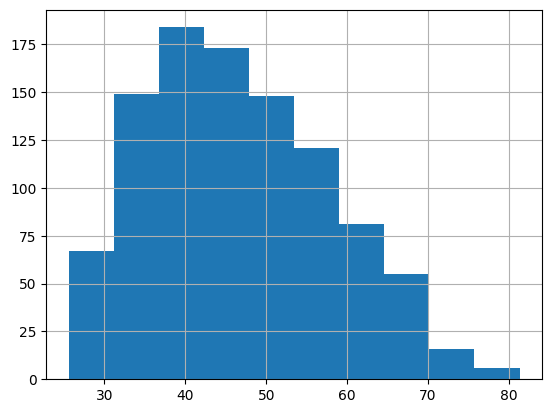

In [ ]:
np.random.seed(42)
modelWithScore['age'] = np.random.beta(2, 4, modelWithScore.shape[0]) * (90-25) + 25
modelWithScore['usCitizen'] = np.random.rand(modelWithScore.shape[0]) > 0.9
modelWithScore['propertyType'] = np.random.choice(["investment", "owner-occupied"], modelWithScore.shape[0])
modelWithScore['age'].hist()

<AxesSubplot:>

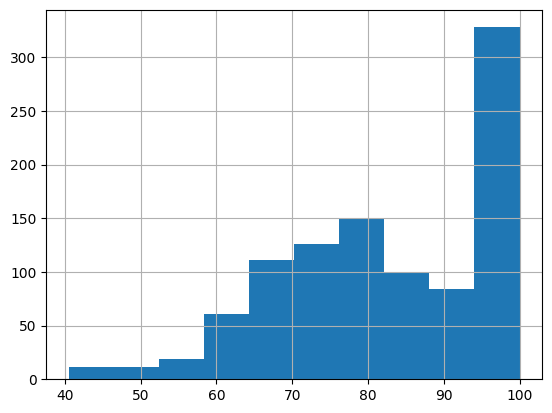

In [ ]:
def pre_knowledge_engineering(df):
    df['ownerOccupied'] = df['propertyType'] == 'owner-occupied'
    df['investment']    = df['propertyType'] == 'investment'
    df['maxLoanSize'] = df['schaetzungObjekt'] * 0.80 * df['ownerOccupied'] + \
                        df['schaetzungObjekt'] * 0.75 * df['investment']
    df['minAnzahlung'] = df['schaetzungObjekt'] - df['maxLoanSize']
    df['liquidAssets'] = df['barvermoegen'] + df['aktienvermoegen'] + df['saeule3a'] + df['lebensversicherung']

    df['eligibleMinAnzahlungFactor'] = (((df['liquidAssets'] / (df['minAnzahlung']/2)) * df['ownerOccupied']) + \
                                        ((df['liquidAssets'] / df['minAnzahlung']  ) * df['investment']))
    df['eligibleMinAnzahlung'] = df['eligibleMinAnzahlungFactor'] >= 1.0

    df['eligibleAmortisationFactor'] = df['maxLoanSize'] / ((df['totalLohn'] * (2/3) * (df['age'] >= 60) + \
                                   df['totalLohn'] * 0.30  * (df['age'] <  60)) * \
                                 (df['ownerOccupied']*10 + \
                                  df['investment']*15))
    df['eligibleAmortisation'] =  df['eligibleAmortisationFactor'] >= 1.0

    df['eligibleMinAnzahlungScore'] = df['eligibleMinAnzahlungFactor'] * (df['eligibleMinAnzahlungFactor'] <= 1) + (df['eligibleMinAnzahlungFactor'] > 1)
    df['eligibleAmortisationScore'] = df['eligibleAmortisationFactor'] * (df['eligibleAmortisationFactor'] <= 1) + (df['eligibleAmortisationFactor'] > 1)

    df['eligibleUsCitizen'] = ~df['usCitizen']
    df['eligible'] = df['eligibleUsCitizen'] & df['eligibleAmortisation'] & df['eligibleMinAnzahlung']
    df['eligibleRegulatoryScore'] = 20*df['eligibleUsCitizen'] + 40*df['eligibleMinAnzahlungScore'] + 40*df['eligibleAmortisationScore']
    
    df.drop(['eligibleAmortisationFactor', 'eligibleMinAnzahlungFactor', 'liquidAssets', 'minAnzahlung', 'maxLoanSize', 'investment', 'ownerOccupied'], axis=1, inplace=True)

    return df


# tests
modelWithScore = pre_knowledge_engineering(modelWithScore)
modelWithScore['eligibleRegulatoryScore'].hist()


In [ ]:
modelWithScore[modelWithScore['eligible']]

,barvermoegen,aktienvermoegen,saeule3a,lebensversicherung,pensionskasse,totalVermoegen,lohn,lohnJahr,bonus,zulagen,...,usCitizen,propertyType,eligibleMinAnzahlung,eligibleAmortisation,eligibleUsCitizen,eligible,eligibleRegulatoryScore,eligibleAmortisationFactorCapped,eligibleMinAnzahlungScore,eligibleAmortisationScore
0,154557.91760,28291.630990,80000,0,109368.55690,3.722181e+05,5600,67200,0.00000,840,...,False,owner-occupied,True,True,True,True,100.0,1.0,1.0,1.0
1,338303.87560,7606.009156,40000,45000,207181.98360,6.380919e+05,9100,109200,0.00000,0,...,False,investment,True,True,True,True,100.0,1.0,1.0,1.0
2,395285.75170,910.833454,40000,0,80878.81724,5.170754e+05,5600,67200,0.00000,840,...,False,investment,True,True,True,True,100.0,1.0,1.0,1.0
3,308723.73680,9147.939781,40000,0,200101.56730,5.579732e+05,13000,156000,15759.38929,0,...,False,investment,True,True,True,True,100.0,1.0,1.0,1.0
8,185792.00790,15878.824980,100000,0,0.00000,3.016708e+05,5600,67200,0.00000,840,...,False,investment,True,True,True,True,100.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,68416.88994,26063.010770,80000,0,82261.74941,2.567417e+05,5600,67200,0.00000,840,...,False,investment,True,True,True,True,100.0,1.0,1.0,1.0
983,42178.28500,29850.569740,80000,0,85170.99559,2.371999e+05,5600,67200,0.00000,840,...,False,owner-occupied,True,True,True,True,100.0,1.0,1.0,1.0
992,332764.55730,5748.506730,80000,57000,780499.24920,1.256012e+06,13000,156000,11409.01430,0,...,False,owner-occupied,True,True,True,True,100.0,1.0,1.0,1.0
993,15102.60435,37514.702030,80000,59000,780499.24920,9.721166e+05,13000,156000,15758.88708,0,...,False,owner-occupied,True,True,True,True,100.0,1.0,1.0,1.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=03c1f381-4bef-44c8-9167-00386ebceba9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>